In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy
import random
import os
from pathlib import Path

from IPython.display import clear_output

In [2]:
root = 'covid-chestxray-dataset/'

In [3]:
path = Path(root)
raw_train_image_paths = list(path.glob('train/*/*.jpg'))
raw_valid_image_paths = list(path.glob('valid/*/*.jpg'))

In [4]:
def parse(c):
    return c.split('/')[-1]

class_names = [str(dir) for dir in path.glob('*/*')]
class_names = list(set(map(parse, class_names)))
class_names

['healthy', 'covid19_infected']

In [5]:
train_image_paths = [str(s) for s in raw_train_image_paths]
valid_image_paths = [str(s) for s in raw_valid_image_paths]

In [6]:
def get_label(file_path):
    partition = tf.strings.split(file_path, '/')
    one_hot = list(map(float, partition[-2] == class_names))
    return tf.convert_to_tensor(one_hot)

In [7]:
def decode_image(img):
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    return tf.image.resize(img, [244, 244])

In [8]:
def process_images(file_path):
    label = get_label(file_path)
    img = tf.io.read_file(file_path)
    img = decode_image(img)
    return img, label

In [9]:
def create_dataset(X, y):
    ds = tf.data.Dataset.from_tensor_slices((X, y))
    ds = ds.shuffle(100).batch(6)
    return ds

In [10]:
raw_train = list(map(process_images, train_image_paths))
raw_valid = list(map(process_images, valid_image_paths))

In [11]:
X_t = []
y_t = []

X_v = []
y_v = []

In [12]:
for data in raw_train:
    X_t.append(data[0])
    y_t.append(data[1])
    
for data in raw_valid:
    X_v.append(data[0])
    y_v.append(data[1])

In [18]:
train_ds = create_dataset(X_t, y_t)
valid_ds = create_dataset(X_v, y_v)

In [19]:
temp_t = list(train_ds)
temp_v = list(valid_ds)

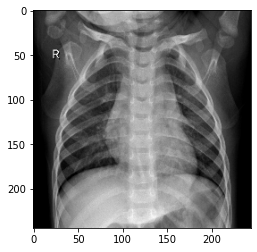

In [21]:
img, _ = next(iter(valid_ds))

plt.imshow(img[0])

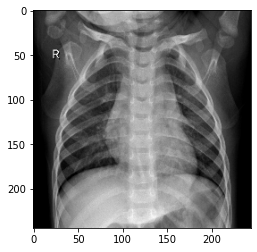

In [22]:
plt.imshow(tf.squeeze(img[0]), cmap='gray')

In [ ]:
# [1, 0] = Covid19 +
# [0, 1] = Covid19 -

In [23]:
# Load Model...
base_model = tf.keras.applications.VGG16(weights='imagenet', 
                                         include_top=False)

In [24]:
top_model = base_model.output
top_model = tf.keras.layers.GlobalAveragePooling2D()(top_model)
top_model = tf.keras.layers.Dense(64, activation=tf.nn.relu)(top_model)
top_model = tf.keras.layers.Dropout(0.5)(top_model)
top_model = tf.keras.layers.Dense(2, activation=tf.nn.softmax)(top_model)

In [25]:
model = tf.keras.Model(inputs=base_model.input, outputs=top_model)

In [26]:
base_model.trainable = False

In [27]:
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [28]:
optimizer = tf.keras.optimizers.Adam(lr=1e-3, decay=1e-3/20)

In [29]:
model.compile(loss=loss_fn, optimizer=optimizer, metrics=['accuracy'])

In [30]:
history = model.fit(train_ds, epochs=25, validation_data=valid_ds)

Train for 7 steps, validate for 2 steps
Epoch 1/25
7/7 [==============================] - 13s 2s/step - loss: 0.7453 - accuracy: 0.4500 - val_loss: 0.7323 - val_accuracy: 0.5000
Epoch 2/25
7/7 [==============================] - 13s 2s/step - loss: 0.6879 - accuracy: 0.5750 - val_loss: 0.7082 - val_accuracy: 0.5000
Epoch 3/25
7/7 [==============================] - 13s 2s/step - loss: 0.6994 - accuracy: 0.5000 - val_loss: 0.6789 - val_accuracy: 0.7500
Epoch 4/25
7/7 [==============================] - 14s 2s/step - loss: 0.6495 - accuracy: 0.7750 - val_loss: 0.6612 - val_accuracy: 0.7500
Epoch 5/25
7/7 [==============================] - 14s 2s/step - loss: 0.6225 - accuracy: 0.8750 - val_loss: 0.6417 - val_accuracy: 0.8333
Epoch 6/25
7/7 [==============================] - 14s 2s/step - loss: 0.6074 - accuracy: 0.8750 - val_loss: 0.6286 - val_accuracy: 0.8333
Epoch 7/25
7/7 [==============================] - 15s 2s/step - loss: 0.6205 - accuracy: 0.8500 - val_loss: 0.6240 - val_accuracy: 0

In [31]:
import time
import numpy as np

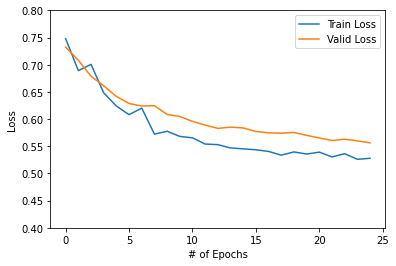

In [38]:
# Visualiser
epoch = 1

time.sleep(7)

while 1:
    time.sleep(0.125)
    
    clear_output(wait=True)
    plt.plot(range(epoch), history.history['loss'][:epoch], label='Train Loss')
    plt.plot(range(epoch), history.history['val_loss'][:epoch], label='Valid Loss')
    plt.xlabel("# of Epochs")
    plt.ylabel("Loss")
    plt.ylim(0.4, 0.8)
    plt.legend()
    plt.show()
    
    if epoch == len(history.history['accuracy']):
        break
    else:
        epoch += 1

AttributeError: 'AxesSubplot' object has no attribute 'set_axis'

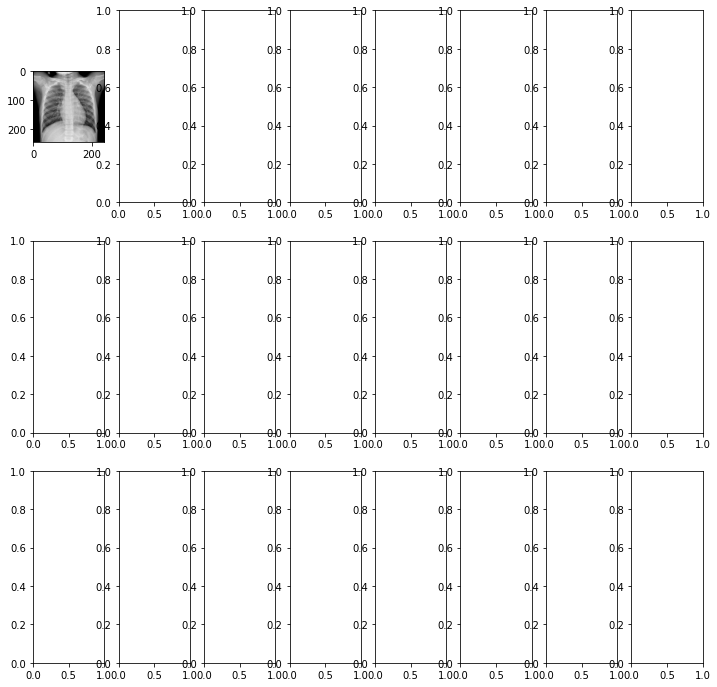

In [18]:
fig, axs = plt.subplots(3, 8, figsize=(12,12))
axs = axs.flatten()

for img, axs in zip(X_t, axs):
    axs.imshow(img)
    
plt.show()